# Show the spatial distribution of missing values in the data

In [1]:
import numpy as np
import sklearn
from nmf_with_missing_values import nmf_with_missing_values
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

## load the data

In [4]:
tmp = np.load('../data/mouse_brain_ISH_float32.npz')
data = tmp['data']
sections = tmp['sections']
original_shape = data.shape

### Compute the histogram of the missing rate at different voxels

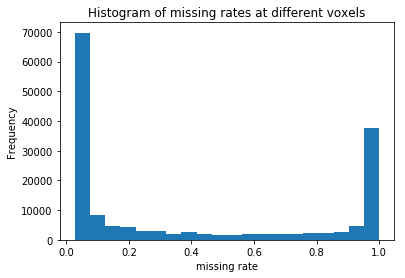

In [31]:
plt.hist(np.mean(data < 0, axis=0).flatten(), bins=20)
plt.title("Histogram of missing rates at different voxels")
plt.xlabel("missing rate")
plt.ylabel("Frequency")
plt.show()

- Observation: In general, the missing rate is quite high.

### Compute the missing rate along each axes

In [46]:
all_missed = (np.mean(data < 0, axis=0) >= .95)
selected = np.logical_not(all_missed)[np.newaxis, :, :, :]

In [46]:
print("The missing rate is {}".format(np.mean((data < 0) * selected) / np.mean(selected)))

The missing rate is 0.21973993260352617


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


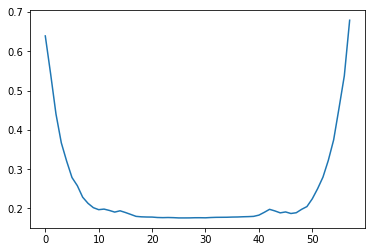

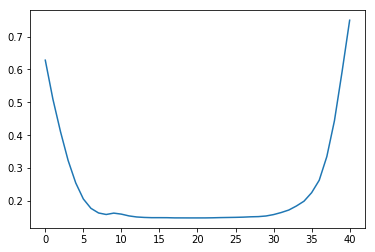

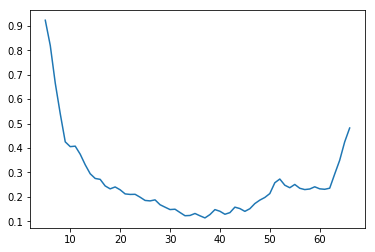

In [46]:
missing_rate_along_z = np.mean((data < 0) * selected, axis=(0,1,2))  / np.mean(selected, axis=(0,1,2))
missing_rate_along_y = np.mean((data < 0) * selected, axis=(0,1,3))  / np.mean(selected, axis=(0,1,3))
missing_rate_along_x = np.mean((data < 0) * selected, axis=(0,2,3))  / np.mean(selected, axis=(0,2,3))
plt.figure()
plt.plot(range(len(missing_rate_along_z)), missing_rate_along_z)
plt.figure()
plt.plot(range(len(missing_rate_along_y)), missing_rate_along_y)
plt.figure()
plt.plot(range(len(missing_rate_along_x)), missing_rate_along_x)

- Observation: the missing rate is high at the boundaries.

### Compute the missing rate for each 2d plane

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


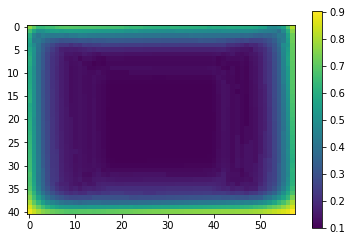

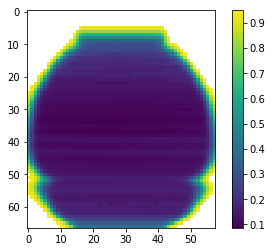

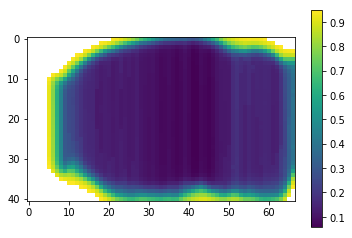

In [51]:
missing_rate_along_yz = np.mean((data < 0) * selected, axis=(0,1))  / np.mean(selected, axis=(0,1))
missing_rate_along_xz = np.mean((data < 0) * selected, axis=(0,2))  / np.mean(selected, axis=(0,2))
missing_rate_along_xy = np.mean((data < 0) * selected, axis=(0,3))  / np.mean(selected, axis=(0,3))
plt.figure()
plt.imshow(missing_rate_along_yz)
plt.colorbar()
plt.figure()
plt.imshow(missing_rate_along_xz)
plt.axis.
plt.colorbar()
plt.figure()
plt.imshow(missing_rate_along_xy.T)
plt.colorbar()

- Observation: The missing rate is high at the boundary.